In [2]:
import pandas as pd

In [46]:
data=pd.read_csv('D:\Insurance_premium_prediction\insurance.csv')

In [84]:
pwd

'd:\\Insurance_premium_prediction\\notebooks'

In [85]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [86]:
#check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [87]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [88]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.652206,1.095737,NaN,NaN,12487.477516
std,14.044333,NaN,6.059550,1.205571,NaN,NaN,10157.526627
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4746.340000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.160000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.720000


In [89]:
## one hot encoding for sex column
data['sex']=data['sex'].map({'male':0,'female':1})

In [90]:
data.sex.value_counts()

sex
0    675
1    662
Name: count, dtype: int64

In [91]:
data.children.value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [92]:
data.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [94]:
data.age.value_counts()

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [95]:
## one hot encoding for smoker column
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [96]:
data.smoker.value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

In [97]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [135]:
## encoding the region column
data['region']=data['region'].map({'southeast':1,'southwest':2,'northwest':3,'northeast':4})

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [100]:
data.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.019814,0.112074,0.041536,-0.025587,0.006833,0.312621
sex,0.019814,1.000000,-0.044840,-0.017848,-0.076596,0.013179,-0.053154
bmi,0.112074,-0.044840,1.000000,0.013578,0.003364,-0.262018,0.161233
children,0.041536,-0.017848,0.013578,1.000000,0.007331,0.001533,0.072402
smoker,-0.025587,-0.076596,0.003364,0.007331,1.000000,-0.038697,0.785963
region,0.006833,0.013179,-0.262018,0.001533,-0.038697,1.000000,-0.023548
expenses,0.312621,-0.053154,0.161233,0.072402,0.785963,-0.023548,1.000000


In [101]:
import seaborn as sns

In [115]:
## removing the outliers
mport numpy as np

def outlier_removal(features):
    q12=np.percentile(data['bmi'],25)
    q32=np.percentile(data['bmi'],75)
    iqr=q32-q12
    lf=q12-(1.5*iqr)
    uf=q32+(1.5*iqr)
    if features<lf:
        features=lf
    if features>uf:
        features=uf
    return features

In [116]:
data['bmi']=data['bmi'].apply(outlier_removal)

<Axes: ylabel='expenses'>

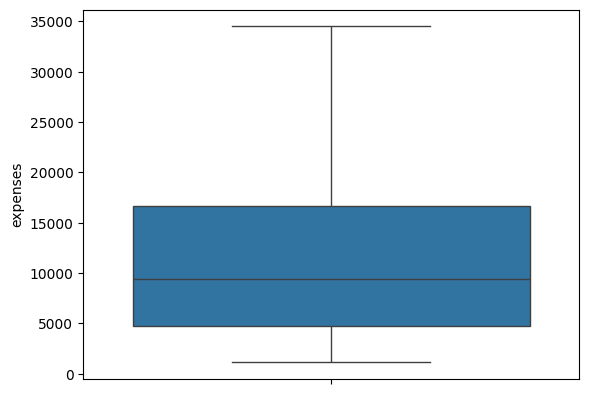

In [118]:
sns.boxplot(data=data['expenses'])

<Axes: ylabel='expenses'>

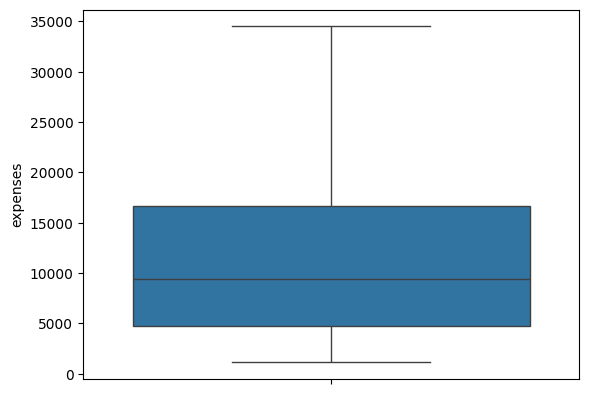

In [51]:
sns.boxplot(data=data['expenses'])

In [57]:
data['expenses'].max()

34489.35625

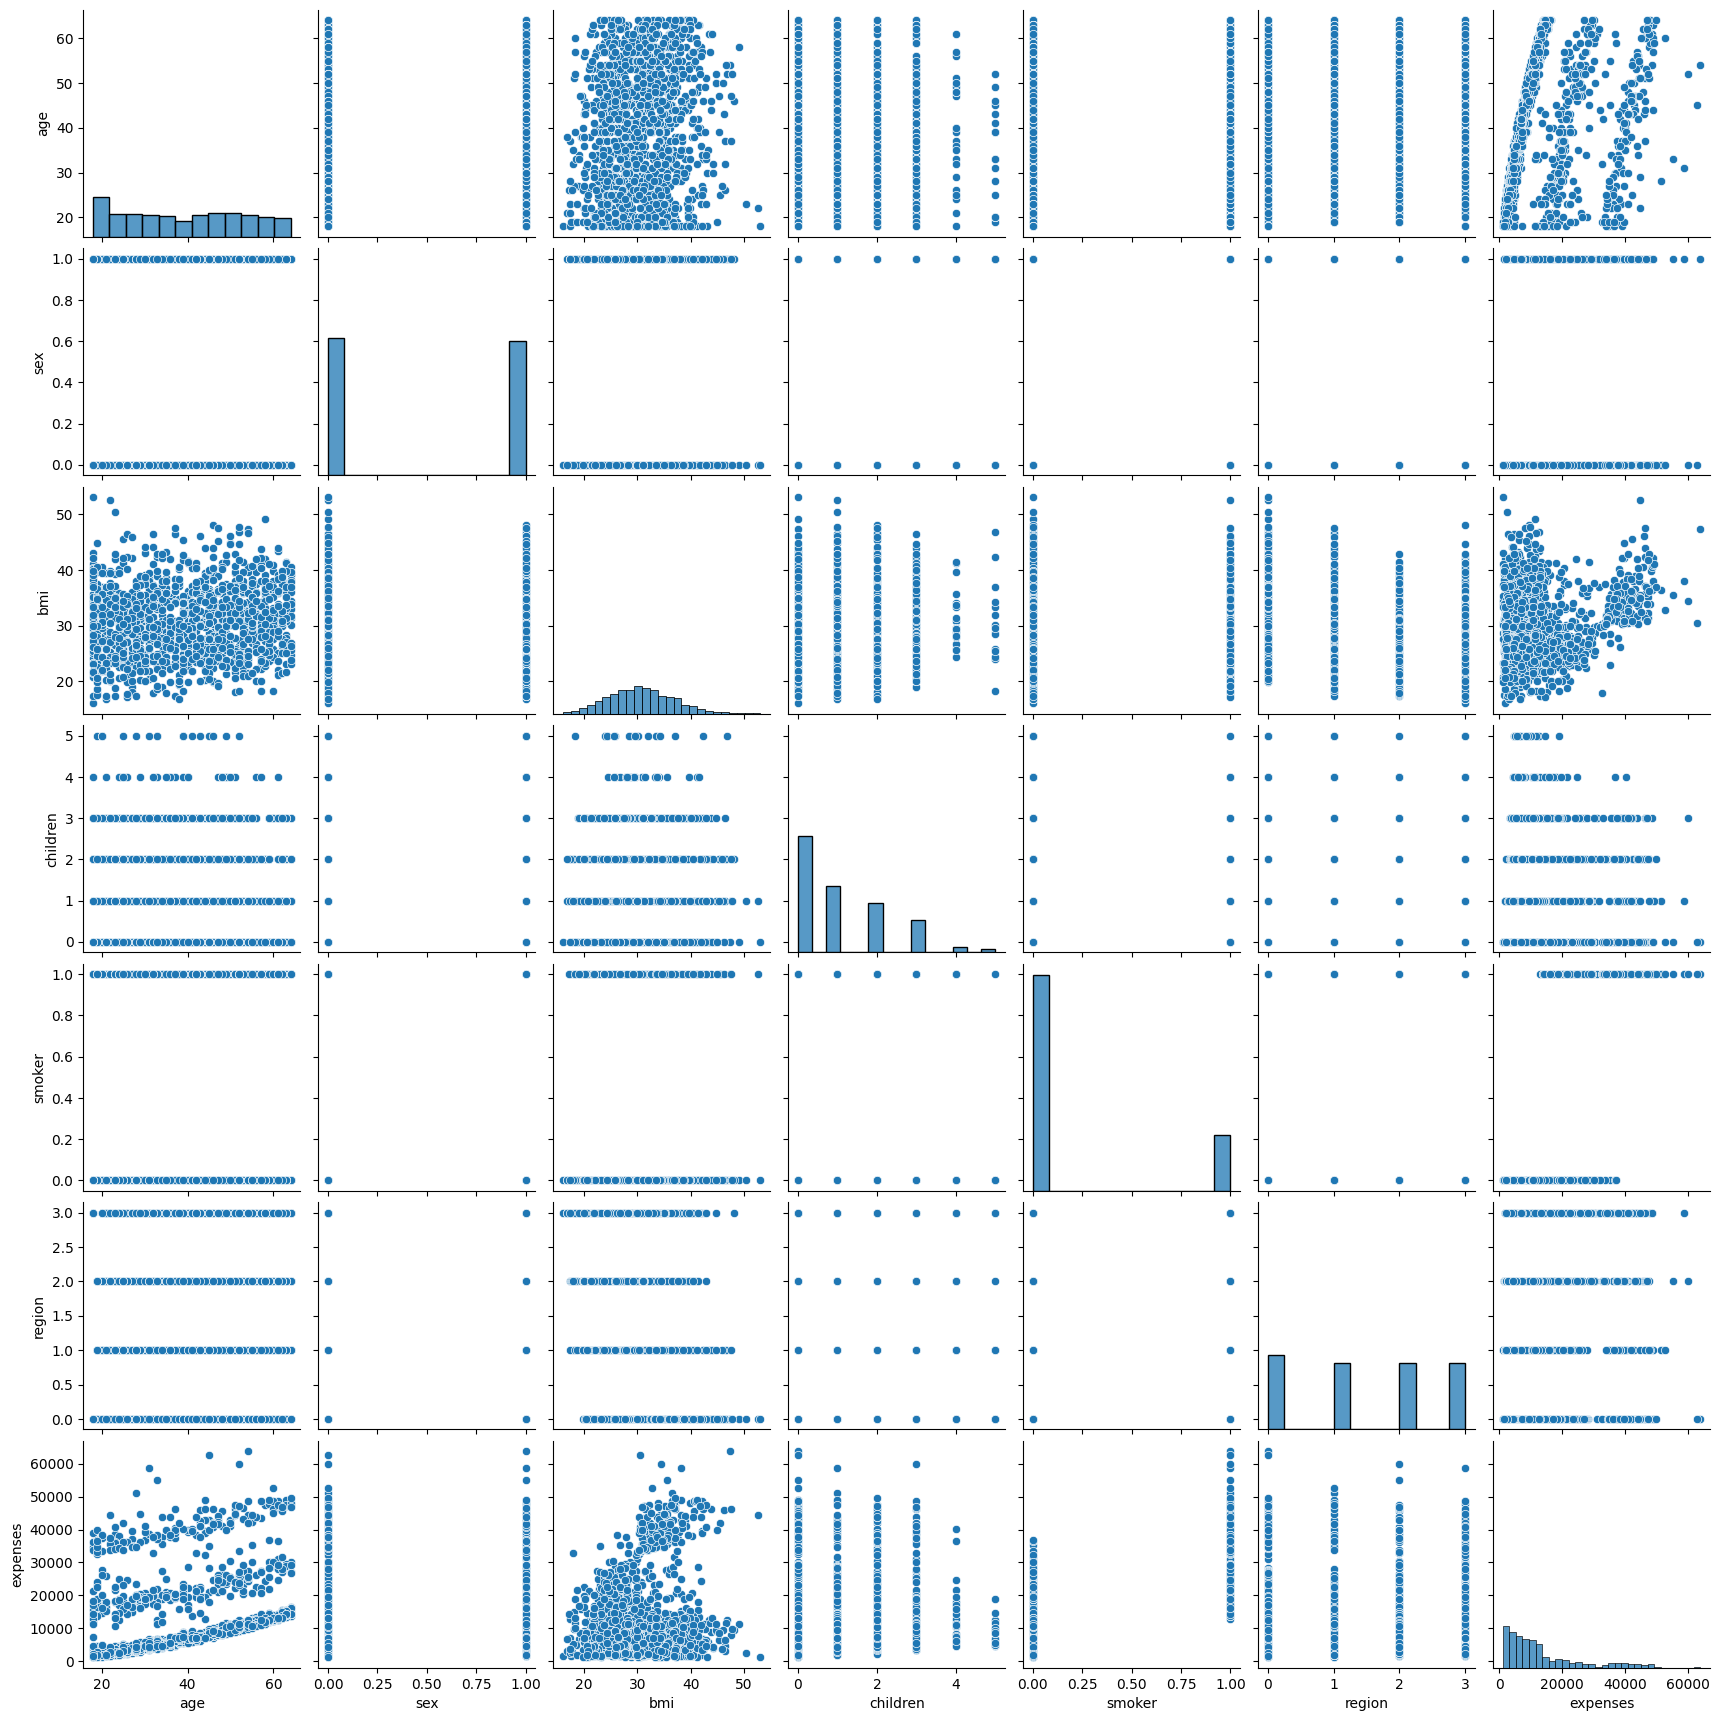

In [51]:
sns.pairplot(data=data)

In [119]:
## check for duplicates

data[data.duplicated()]

,age,sex,bmi,children,smoker,region,expenses


In [120]:
data=data.drop_duplicates()

In [136]:
data.to_csv('cleaned_data.csv',index=False)

In [144]:
### checking the cleaned data
df=pd.read_csv('cleaned_data.csv')

In [145]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [146]:
df['region'].value_counts()

region
2    364
1    325
3    325
4    324
Name: count, dtype: int64

In [147]:
x=df.drop('expenses',axis=1)

In [148]:
y=df['expenses']

In [78]:
pip install -U scikit-learn

  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/59.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/59.0 kB ? eta -:--:--
     -------------------------------------- 59.0/59.0 kB 389.9 kB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

## Linear regression

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
model=LinearRegression()

In [153]:
model.fit(x_train,y_train)

LinearRegression()

In [154]:
model.score(x_train,y_train)

0.7492626993312902

In [155]:
y_pred=model.predict(x_test)

In [156]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [157]:
score

0.6774419601049877

## Decision Tree Regressor

In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [159]:
model2=DecisionTreeRegressor()

In [162]:
model2.fit(x,y)

DecisionTreeRegressor()

In [164]:
model2.score(x,y)

0.998667156135576

In [165]:
from sklearn.model_selection import cross_val_score

In [184]:
score2=cross_val_score(model2, x, y, cv=10)

In [185]:
score2.mean()

0.7017992393482247

## Random Forest Regressor

In [170]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
param_grid = {
    'max_depth': [5,6,7,8],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}


In [175]:
regr = RandomForestRegressor()

In [174]:
grid_search=GridSearchCV(estimator=regr,param_grid=param_grid,cv=5)

In [177]:
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [178]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [187]:
 regr = RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=2, random_state=0)

In [188]:
regr.fit(x,y)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, random_state=0)

In [189]:
regr.score(x,y)

0.8845967789676821

In [190]:
score3=cross_val_score(regr, x, y, cv=10)

In [192]:
score3.mean()

0.8592717026866705

## Bagging Regressor

In [193]:
from sklearn.ensemble import BaggingRegressor

In [194]:
regr = BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=5, random_state=0).fit(x, y)

In [195]:
regr.score(x,y)

0.956750866321717

In [197]:
score4=cross_val_score(regr, x, y, cv=10)

In [198]:
score4.mean()

0.8077318301759716

## Adaboost Regressor

In [199]:
from sklearn.ensemble import AdaBoostRegressor

In [200]:
 regr = AdaBoostRegressor(random_state=0, n_estimators=10)

In [201]:
regr.fit(x, y)

AdaBoostRegressor(n_estimators=10, random_state=0)

In [202]:
regr.score(x, y)

0.8367457422507666

In [204]:
score5=cross_val_score(regr, x, y, cv=10)

In [206]:
score5.mean()

0.8224491917747947